# FCV Slide Deck 
XX.

In [9]:
# %% [markdown]
# Add this cell at the beginning of your notebook

from IPython.display import HTML

def hide_code():
    return HTML('''
        <script>
            code_show=true; 
            function code_toggle() {
                if (code_show){
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            } 
            $( document ).ready(code_toggle);
        </script>
        <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>
    ''')

hide_code()

In [1]:
# %%
# jupyter: {'source_hidden': true}
import os
import sys
import re
import requests
import socket
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
from typing import List, Dict, Any, Optional, Union
import numpy as np

# Add the project root to the Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

data_dir = os.path.join(root_dir, 'data')  
source_dir = os.path.join(root_dir, 'data', 'fsi-historic')   

from src.utils import UCDP, GIC, ACLEDDataFetcher, RegionMapper, UNHCRDataFinder, WorldBankAPI, FSIDataProcessor, FragilityClassifier, RefugeeAnalyzer, UNPopulationDataPortalAPI

# Set visualization style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Initialize UCDP processor
ucdp = UCDP()
gic = GIC()
acled = ACLEDDataFetcher(api_key="FVlH2Cg6J1EmOKTxxsUX", email="mpurroyvitola@worldbank.org")
region_mapper = RegionMapper()
unhcr = UNHCRDataFinder()
wb = WorldBankAPI()

print("✓ Setup complete: All required libraries imported and styles set")

✓ Setup complete: All required libraries imported and styles set


# Data Processing

In [3]:
# %%
# jupyter: {'source_hidden': true}
# Fetch UCDP data
raw_data = ucdp.fetch_ucdp_data()
df_conflicts = ucdp.process_conflict_data(raw_data)
df_avg_duration = ucdp.calculate_average_duration(raw_data)

# Fetch fatalities data for a specific period
# fatalities_df = ucdp.fetch_fatalities_data(
#     start_date='1995-11-01',
#     end_date='2024-12-31'
# )

# # Fetch GIC data
# df_gic = gic.processed_data

# # Initialize ACLED data fetcher
# # Create date objects
# start_date = datetime(2013, 1, 1)
# end_date = datetime(2025, 1, 31)

# # Fetch raw data
# df_acled = acled.fetch_data(start_date, end_date)

# # Process the data
# df_acled_processed = acled.process_data(df_acled)

# # Get conflict-related deaths if needed
# df_acled_crd = acled.get_conflict_related_deaths(df_acled_processed)

# # Get event counts if needed
# df_acled_events = acled.get_event_counts(df_acled_processed)

# Get processed data suitable for visualization
# df_unchr = unhcr.process_displacement_data(2015, 2024)


# # Initialize the analyzer
# analyzer = RefugeeAnalyzer()

# try:
#     # Get historical analysis
#     print("Getting historical analysis for recent years...")
#     stats_df, detailed_df = analyzer.analyze_historical_trends(2020, 2022)
    
#     # Print top origin countries for most recent year
#     latest_year = detailed_df['year'].max()
#     latest_data = detailed_df[detailed_df['year'] == latest_year]
    
#     print(f"\nTop 15 Refugee Origin Countries ({latest_year}):")
#     origin_data = latest_data.nlargest(15, 'refugees_originated')[
#         ['country', 'refugees_originated', 'idps']
#     ]
#     print(origin_data.to_string(index=False, float_format=lambda x: f'{x:,.0f}'))
    
#     print(f"\nTop 15 Refugee Host Countries ({latest_year}):")
#     host_data = latest_data.nlargest(15, 'refugees_hosted')[
#         ['country', 'refugees_hosted', 'asylum_seekers_hosted']
#     ]
#     print(host_data.to_string(index=False, float_format=lambda x: f'{x:,.0f}'))
    
#     # Get country trends
#     country_trends = analyzer.get_country_trends(detailed_df)
    
#     print("\nLargest Changes in Refugee Numbers (2020-2022):")
#     print(country_trends.nlargest(10, 'refugees_change')[
#         ['country', 'current_refugees', 'refugees_change']
#     ].to_string(index=False, float_format=lambda x: f'{x:,.1f}'))
    
# except Exception as e:
#     print(f"Error in analysis: {str(e)}")

# World Bank API
# Get CPIA data for for all countires from 2015 to 2024
# cpia_data = wb.get_indicator_data(
#     country_code=None,  # None means all countries
#     indicator='IQ.CPA.IRAI.XQ',
#     start_year=2015,
#     end_year=2024
# )

# # Print the results
# print(cpia_data)


# try:
#     processor = FSIDataProcessor(
#         source_dir= source_dir,  # Make sure this path is correct
#         output_dir=""  # This directory can be empty if you're not saving
#     )
    
#     # Process the data
#     monthly_data = processor.process_fsi_data()


# # Initialize the classifier
# classifier = FragilityClassifier(data_dir=data_dir)

# # Get classifications for a specific year
# classifications_2022 = classifier.get_classification(2022)
# print(classifications_2022)
# print("Extremely fragile countries in 2022:", classifications_2022['extreme'])


# # Initialize the API client
# api_client = UNPopulationDataPortalAPI()

# # Test API connection
# if not api_client.test_api_connection():
#     logger.error("Unable to establish API connection.")
#     sys.exit(1)

# try:
#     # Retrieve country IDs
#     country_ids = api_client.get_country_ids()
#     logger.info(f"Total Countries Retrieved: {len(country_ids)}")
#     logger.info("First 10 Country IDs: %s", country_ids[:10])

# except Exception as e:
#     logger.error(f"An error occurred: {e}")
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}
    

1000 records fetched so far...
Retrieved all 1686 records
Total records fetched: 1686

Processed data summary:
Years covered: 1959-2023
Number of years: 65
Total conflicts: 1686


{'tags': ['hide_input', 'hide_output']}

# Figure 1: Number of Armed Conflicts by Type
This visualization shows the evolution of different types of conflicts over time:
- Extra-systemic conflicts: Between a state and a non-state group outside its territory
- Inter-state conflicts: Between states
- Internal conflicts: Between a government and rebel groups
- Internationalized internal conflicts: Internal conflicts with foreign government involvement

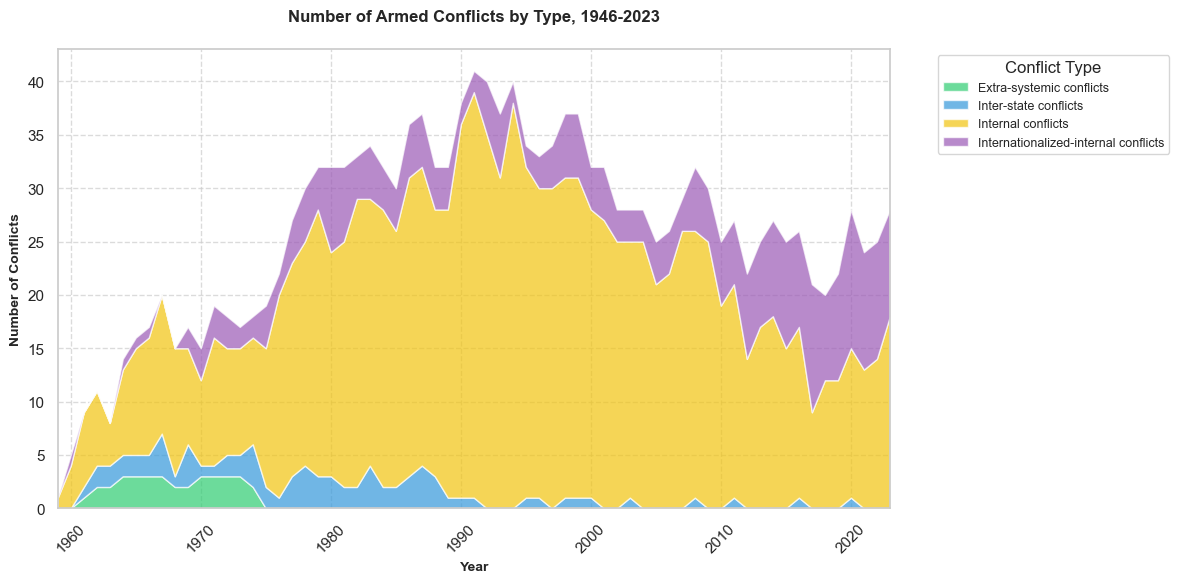


Data Summary:
Time period: 1959-2023
Total conflicts: 1686

Conflicts by type:
Extra-systemic conflicts: 35
Inter-state conflicts: 81
Internal conflicts: 1273
Internationalized-internal conflicts: 297


In [18]:
# %%
# jupyter: {'source_hidden': true}
def create_conflict_plot(df, save_fig=False):
    """Create stacked area plot showing evolution of conflict types"""
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get colors for each conflict type
    colors = [UCDP.get_conflict_colors()[col] for col in df.columns]
    
    # Create stacked area plot
    ax.stackplot(df.index, 
                [df[col] for col in df.columns],
                labels=df.columns,
                colors=colors,
                alpha=0.7)
    
    # Customize plot
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Conflicts', fontsize=10, fontweight='bold')
    ax.set_title('Number of Armed Conflicts by Type, 1946-2023',
                fontsize=12, pad=20, fontweight='bold')
    
    # Set x-axis range
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add legend
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=9,
        title='Conflict Type',
        frameon=True
    )
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('conflict_evolution.png',
                    dpi=300,
                    bbox_inches='tight')
    
    return fig

# Create and display visualization
fig = create_conflict_plot(df_conflicts)
plt.show()

# Print summary statistics
print("\nData Summary:")
print(f"Time period: {df_conflicts.index.min()}-{df_conflicts.index.max()}")
print(f"Total conflicts: {df_conflicts.sum().sum():.0f}")
print("\nConflicts by type:")
for col in df_conflicts.columns:
    print(f"{col}: {df_conflicts[col].sum():.0f}")

# Figure 2 - Average duration of armed conflict worldwide, 1965-2023
XX.

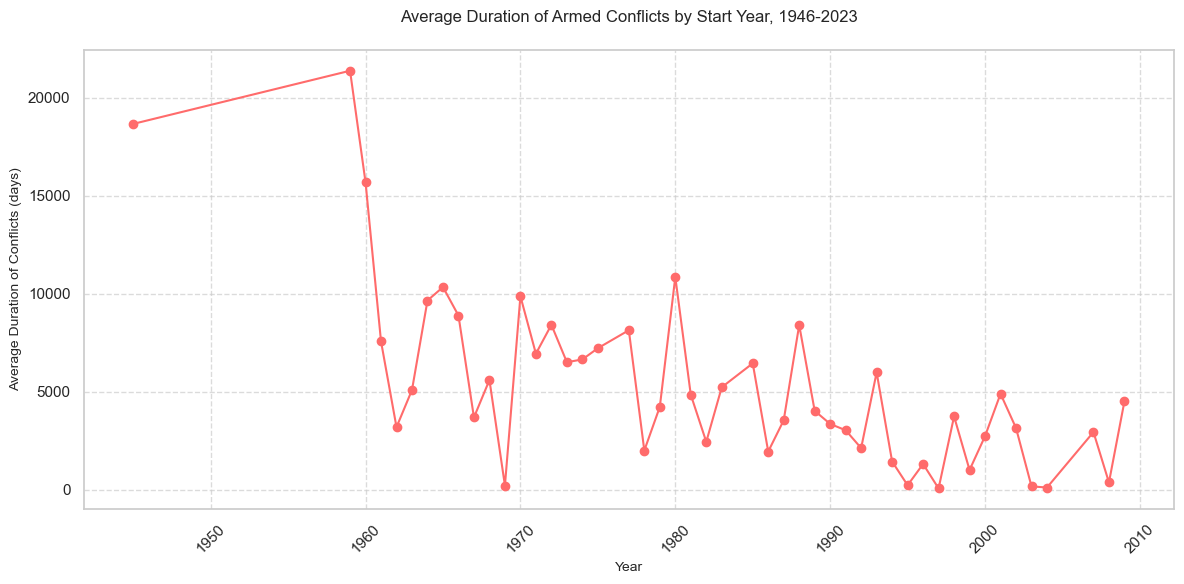


Visualization created successfully!


In [19]:
# %%
# jupyter: {'source_hidden': true}
def create_conflict_duration_plot(df_avg_duration, save_fig=False):
    """
    Create and display the conflict duration visualization.
    
    Args:
        df_avg_duration (pd.DataFrame): DataFrame containing average duration data
        save_fig (bool): Whether to save the figure to file
    """
    # Validate the processed data
    if df_avg_duration.empty:
        raise ValueError("Processed data is empty")
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot average duration of conflicts by start year
    ax.plot(df_avg_duration['Year'], df_avg_duration['Average Duration'], marker='o', linestyle='-', color='#FF6B6B')
    
    # Customize the plot
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Average Duration of Conflicts (days)', fontsize=10)
    ax.set_title('Average Duration of Armed Conflicts by Start Year, 1946-2023', 
                fontsize=12, pad=20)
    
    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save if requested
    if save_fig:
        plt.savefig('conflict_duration.png', 
                    dpi=300, 
                    bbox_inches='tight')
    
    return fig

# Generate the visualization
try:
    fig = create_conflict_duration_plot(df_avg_duration)
    plt.show()
    
    print("\nVisualization created successfully!")
    
except Exception as e:
    print(f"Error creating visualization: {str(e)}")

# Figure 3 - GLobal Coup Attempts
XX.

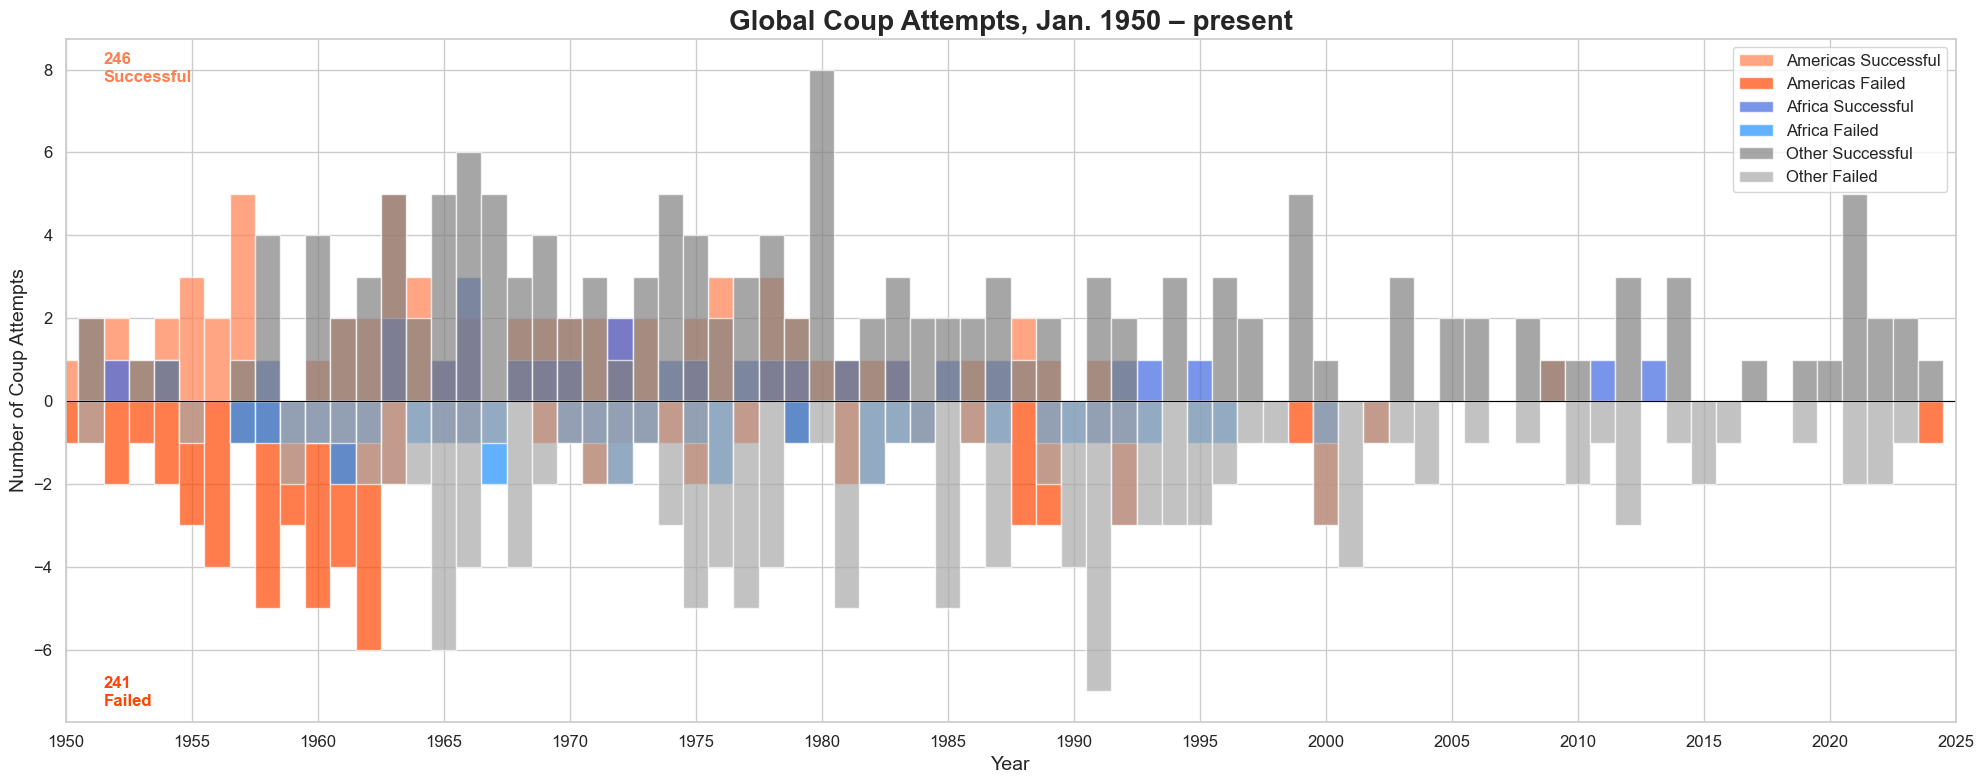

✓ Figure 3 generated successfully


In [27]:
def plot_global_coup_attempts(data, start_year=1950, end_year=2025):
    """
    Create a visualization of global coup attempts
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Processed coup data 
    start_year : int, optional
        Starting year for the plot (default is 1950)
    end_year : int, optional
        Ending year for the plot to nowadays
    
    Returns:
    --------
    matplotlib.pyplot
        Visualization of coup attempts
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure with specific dimensions
    fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
    
    # Filter data for specified year range
    plot_data = data[
        (data['year'] >= start_year) & 
        (data['year'] <= end_year)
    ]
    
    # Group data by year, region, and coup status
    yearly_data = plot_data.groupby(['year', 'region', 'coup_status']).size().reset_index(name='count')
    
    # Color palette
    colors = {
        ('Americas', 2): '#FF7F50',   # Lighter orange for successful Americas coups
        ('Americas', 1): '#FF4500',   # Darker orange for failed Americas coups
        ('Africa', 2): '#4169E1',     # Lighter blue for successful Africa coups
        ('Africa', 1): '#1E90FF',     # Darker blue for failed Africa coups
        ('Other', 2): '#808080',      # Light gray for successful Other coups
        ('Other', 1): '#A9A9A9'       # Dark gray for failed Other coups
    }
    
    # Regions to plot
    regions = ['Americas', 'Africa', 'Other']
    
    # Plot each region's coups
    for region in regions:
        region_data = yearly_data[yearly_data['region'] == region]
        
        # Successful coups (above zero)
        successful = region_data[region_data['coup_status'] == 2]
        for _, row in successful.iterrows():
            ax.bar(row['year'], row['count'], 
                   color=colors.get((region, 2), '#808080'), 
                   alpha=0.7, width=1, label=f'{region} Successful' if row['year'] == successful.iloc[0]['year'] else "")
        
        # Failed coups (below zero)
        failed = region_data[region_data['coup_status'] == 1]
        for _, row in failed.iterrows():
            ax.bar(row['year'], -row['count'], 
                   color=colors.get((region, 1), '#A9A9A9'), 
                   alpha=0.7, width=1, label=f'{region} Failed' if row['year'] == failed.iloc[0]['year'] else "")
    
    # Styling
    ax.set_title('Global Coup Attempts, Jan. 1950 – present', fontsize=20, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Number of Coup Attempts', fontsize=14)
    
    # X-axis setup
    ax.set_xlim(start_year, end_year)
    ax.set_xticks(np.arange(start_year, end_year+1, 5))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Zero line
    ax.axhline(y=0, color='black', linewidth=0.8)
    
    # Total coup annotations
    successful_total = yearly_data[yearly_data['coup_status'] == 2]['count'].sum()
    failed_total = yearly_data[yearly_data['coup_status'] == 1]['count'].sum()
    
    ax.text(0.02, 0.98, f'{successful_total}\nSuccessful', transform=ax.transAxes, 
            verticalalignment='top', fontsize=12, fontweight='bold', color='#FF7F50')
    ax.text(0.02, 0.02, f'{failed_total}\nFailed', transform=ax.transAxes, 
            verticalalignment='bottom', fontsize=12, fontweight='bold', color='#FF4500')
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=12, frameon=True)
    
    plt.tight_layout()
    return plt

# Example usage
if __name__ == '__main__':
    # Assuming df_gic is the coup data DataFrame
    plt = plot_global_coup_attempts(df_gic)
    plt.show()
    
print("✓ Figure 3 generated successfully")

# Figure 4.1 - Conflict-induced fatalities by region (ACLED)
XX.

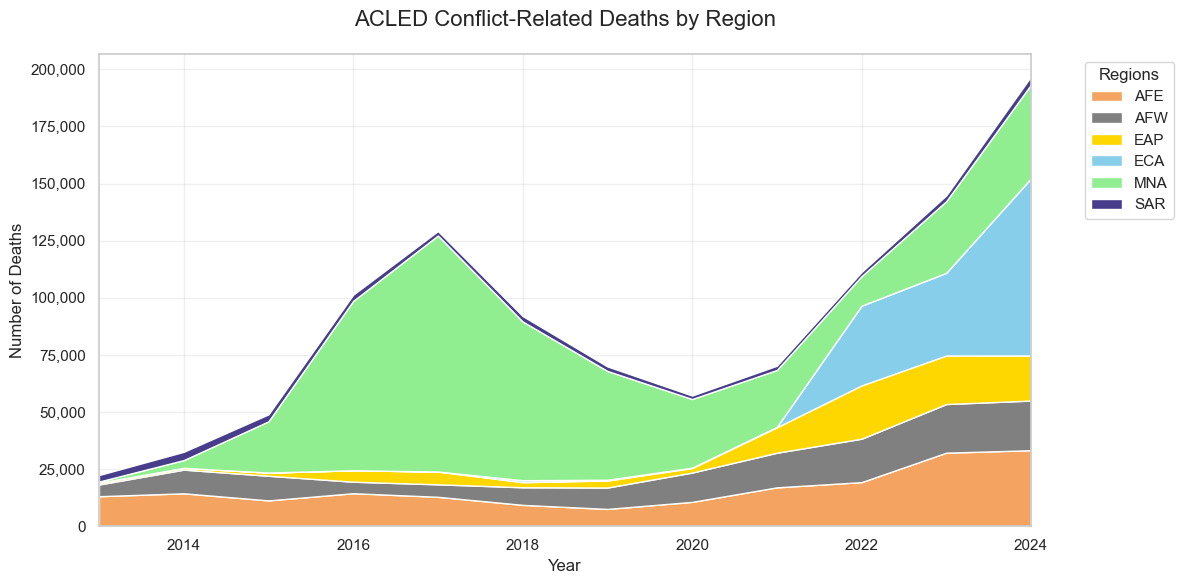

✓ Figure 4 generated successfully


In [18]:
def plot_acled_regional_deaths(df_acled_crd, region_mapper=None):
    """
    Create a stacked area plot of ACLED conflict-related deaths by region
    
    Parameters:
    -----------
    df_acled_crd : pd.DataFrame
        DataFrame with columns: iso3, year, month, ACLED_conflict_related_deaths
    region_mapper : RegionMapper, optional
        Region mapping object (default creates a simple one)
    
    Returns:
    --------
    matplotlib.pyplot
        Stacked area plot of deaths by region
    """
    import pycountry

    if region_mapper is None:
        region_mapper = RegionMapper()
    
    # Comprehensive region mapping
    region_mapping = {
        'AFE': [  # Eastern Africa
            'Kenya', 'Ethiopia', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 
            'Somalia', 'South Sudan', 'Sudan', 'Eritrea', 'Djibouti'
        ],
        'AFW': [  # Western Africa
            'Nigeria', 'Ghana', 'Senegal', 'Mali', 'Burkina Faso', 'Guinea', 
            'Ivory Coast', 'Liberia', 'Sierra Leone', 'Togo', 'Benin', 'Niger', 
            'Gambia', 'Guinea-Bissau', 'Cape Verde'
        ],
        'EAP': [  # East Asia & Pacific
            'China', 'Japan', 'South Korea', 'Indonesia', 'Philippines', 'Vietnam', 
            'Thailand', 'Myanmar', 'Cambodia', 'Laos', 'Malaysia', 'Mongolia', 
            'Singapore', 'Papua New Guinea', 'Australia', 'New Zealand'
        ],
        'ECA': [  # Europe & Central Asia
            'Russia', 'Turkey', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'Georgia', 
            'Azerbaijan', 'Armenia', 'Moldova', 'Belarus', 'Poland', 'Romania', 
            'Bulgaria', 'Greece', 'Serbia', 'Croatia'
        ],
        'MNA': [  # Middle East & North Africa
            'Egypt', 'Iran', 'Iraq', 'Syria', 'Lebanon', 'Jordan', 'Palestine', 
            'Israel', 'Yemen', 'Saudi Arabia', 'United Arab Emirates', 'Algeria', 
            'Morocco', 'Tunisia', 'Libya', 'Bahrain', 'Kuwait', 'Oman', 'Qatar'
        ],
        'SAR': [  # South Asia
            'India', 'Pakistan', 'Bangladesh', 'Afghanistan', 'Nepal', 'Sri Lanka', 
            'Bhutan', 'Maldives'
        ]
    }
    
    def map_country_to_region(iso3):
        try:
            country_name = pycountry.countries.get(alpha_3=iso3).name
            for region, countries in region_mapping.items():
                if any(country.lower() in country_name.lower() for country in countries):
                    return region
            return 'Other'
        except (AttributeError, ValueError):
            return 'Other'
    
    # Create a copy of the DataFrame to avoid modifying the original
    df = df_acled_crd.copy()
    
    # Add region column
    df['region'] = df['iso3'].apply(map_country_to_region)
    
    # Group by year and region, sum deaths
    yearly_region_deaths = df.groupby(['year', 'region'])['ACLED_conflict_related_deaths'].sum().unstack(fill_value=0)
    
    # Ensure all regions are present
    regions = ['AFE', 'AFW', 'EAP', 'ECA', 'MNA', 'SAR']
    for region in regions:
        if region not in yearly_region_deaths.columns:
            yearly_region_deaths[region] = 0
    
    # Select and order columns
    yearly_region_deaths = yearly_region_deaths[regions]
    
    # Filter for years 2013-2024
    yearly_region_deaths = yearly_region_deaths.loc[2013:2024]
    
    # Create the stacked area plot
    plt.figure(figsize=(12, 6))
    
    # Color palette matching the original figure
    colors = {
        'AFE': '#F4A460',   # Sandy Brown
        'AFW': '#808080',   # Gray
        'EAP': '#FFD700',   # Gold
        'ECA': '#87CEEB',   # Sky Blue
        'MNA': '#90EE90',   # Light Green
        'SAR': '#483D8B'    # Dark Slate Blue
    }
    
    # Plot stacked area
    plt.stackplot(yearly_region_deaths.index, 
                 [yearly_region_deaths[region] for region in regions],
                 labels=regions,
                 colors=[colors[region] for region in regions])
    
    # Styling
    plt.title('ACLED Conflict-Related Deaths by Region', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlim(2013, 2024)
    plt.grid(True, alpha=0.3)
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.tight_layout()
    return plt

# Create the plot
plot = plot_acled_regional_deaths(df_acled_crd)
plot.show()

print("✓ Figure 4 generated successfully")

# Figure 4.2 - Conflict-induced fatalities by type of conflict (UCDP)
XX.

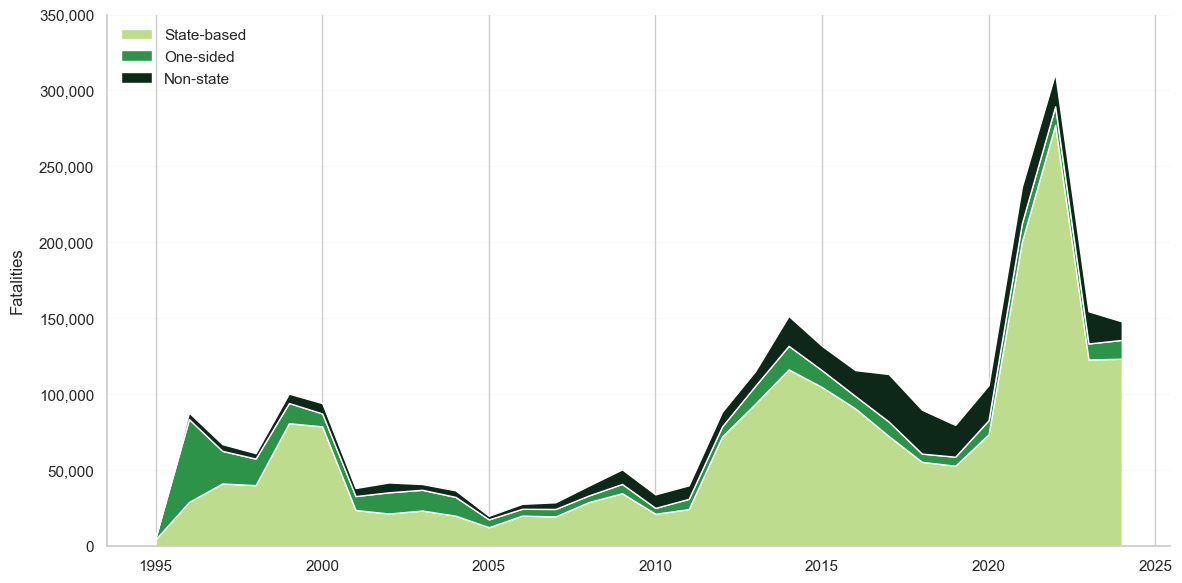

✓ Figure 5 generated successfully


In [4]:
def plot_fatalities(df: pd.DataFrame, output_path: Optional[str] = None) -> None:
    """
    Create a stacked area plot of fatalities by violence type
    
    Parameters:
    -----------
    df : pd.DataFrame
        Processed fatalities data containing columns:
        total_deaths_state_based, total_deaths_one_sided, total_deaths_non_state
    output_path : str, optional
        If provided, save the plot to this path
    """
    # Create the figure
    plt.figure(figsize=(12, 6))
    
    # Extract data for each violence type
    years = df.index
    state_based = df['total_deaths_state_based']
    one_sided = df['total_deaths_one_sided']
    non_state = df['total_deaths_non_state']
    
    # Create stacked area plot
    plt.stackplot(years, 
                 [state_based, one_sided, non_state],
                 labels=['State-based', 'One-sided', 'Non-state'],
                 colors=['#BDDC8D', '#2D9348', '#0D2818'])  # Light green, Medium green, Dark green
    
    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Fatalities', rotation=90, labelpad=10)
    
    # Format y-axis with thousands
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add thousands separator to y-axis labels
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticks(current_values)
    
    # Customize grid (only horizontal lines)
    plt.grid(axis='y', linestyle='-', alpha=0.1)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Customize legend
    plt.legend(loc='upper left', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Plot saved to {output_path}")
        
    return plt
    
 
plot = plot_fatalities(fatalities_df)
plot.show() 

print("✓ Figure 5 generated successfully")

# Figure 4.3 - UCDP by income group
XX.

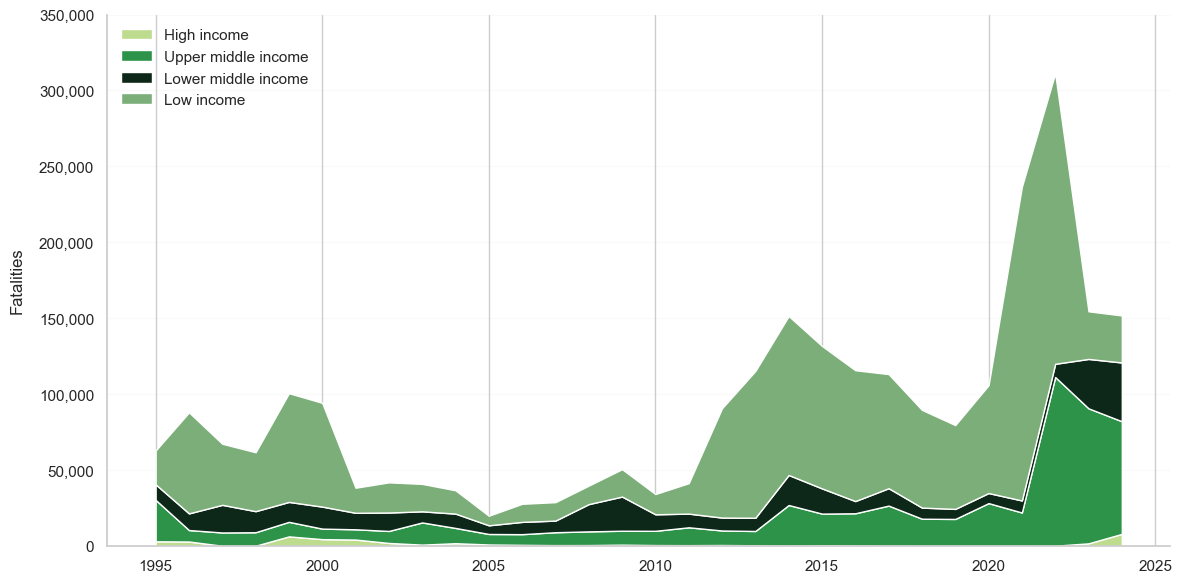

In [6]:
def plot_fatalities_by_income(data_dir: str):
    """
    Create a stacked area plot of total fatalities by income group
    
    Parameters:
    -----------
    data_dir : str
        Directory containing both UCDP and lending group data
    """
    # Construct file paths
    ucdp_path = os.path.join(data_dir, 'ucdp.csv')
    lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')
    
    # Read data
    ucdp = pd.read_csv(ucdp_path, usecols=['iso3', 'year', 'UCDP_BRD'])
    lend_group = pd.read_excel(lend_group_path)
    
    # Merge datasets
    df = ucdp.merge(lend_group[['Code', 'Income group']], 
                    left_on='iso3', 
                    right_on='Code', 
                    how='left')
    
    # Group by year and income group, sum fatalities
    yearly_fatalities = df.groupby(['year', 'Income group'])['UCDP_BRD'].sum().reset_index()
    
    # Pivot data for plotting
    fatalities_pivot = yearly_fatalities.pivot(
        index='year',
        columns='Income group',
        values='UCDP_BRD'
    )
    
    # Create the figure
    plt.figure(figsize=(12, 6))
    
    # Filter years between 1995 and 2024
    fatalities_pivot = fatalities_pivot[(fatalities_pivot.index >= 1995) & (fatalities_pivot.index < 2025)]
    years = fatalities_pivot.index
    income_groups = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
    
    # Filter and reorder columns based on income groups that exist in the data
    available_groups = [group for group in income_groups if group in fatalities_pivot.columns]
    fatalities_data = [fatalities_pivot[group].fillna(0) for group in available_groups]
    
    # Define colors for income groups
    colors = ['#BDDC8D', '#2D9348', '#0D2818', '#7CAE7A']  # Light green to dark green
    
    # Create stacked area plot
    plt.stackplot(years, 
                 fatalities_data,
                 labels=available_groups,
                 colors=colors[:len(available_groups)])
    
    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Fatalities', rotation=90, labelpad=10)
    
    # Format y-axis with thousands
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add thousands separator to y-axis labels
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticks(current_values)
    
    # Customize grid (only horizontal lines)
    plt.grid(axis='y', linestyle='-', alpha=0.1)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Customize legend
    plt.legend(loc='upper left', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

plot = plot_fatalities_by_income(data_dir)
plot.show()

# Figure 6 - Forcibly Displaced Persons
XX.

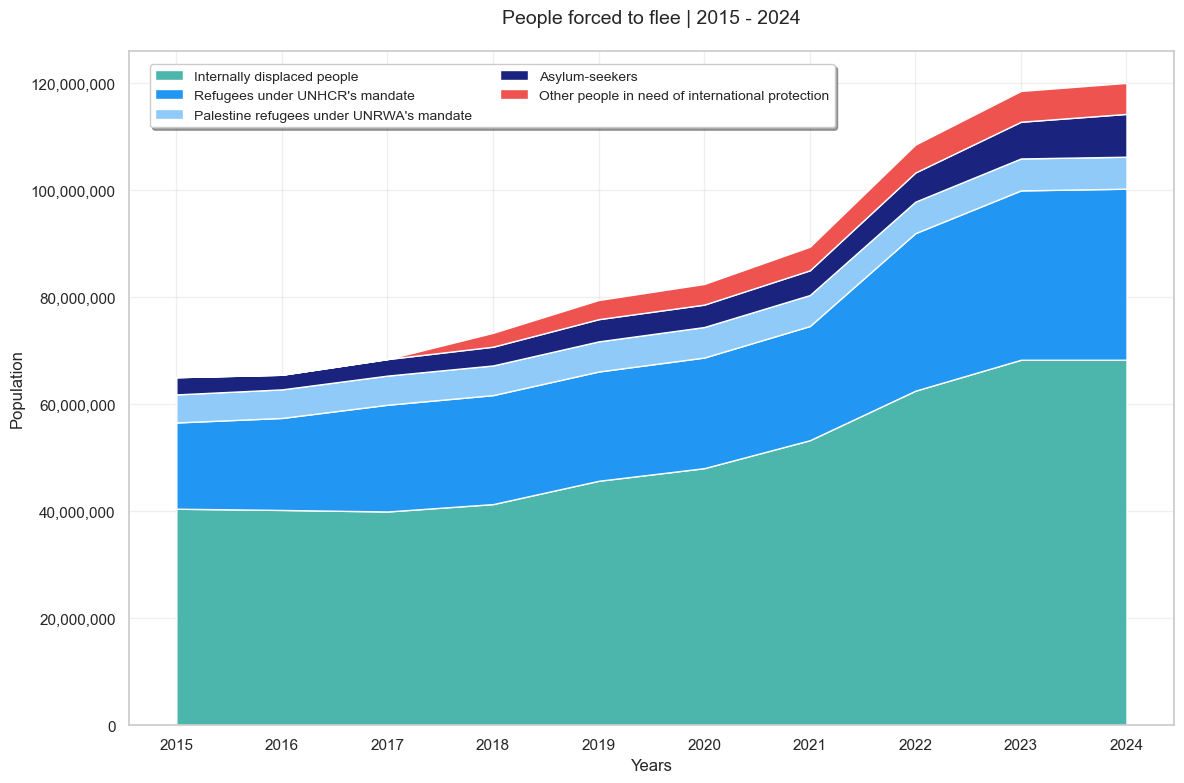

✓ Figure 4 generated successfully


In [10]:
def prepare_data_for_plotting(df):
    """
    Prepare the data for plotting by ensuring correct types and handling missing values
    """
    # List of columns that should be numeric
    numeric_cols = ['refugees_unhcr', 'asylum_seekers', 'other_protection', 
                   'refugees_unrwa', 'idps']
    
    # Create a copy to avoid modifying the original
    plot_df = df.copy()
    
    # Convert numeric columns and replace '-' with 0
    for col in numeric_cols:
        # Replace '-' with 0
        if col in plot_df.columns:
            plot_df[col] = plot_df[col].replace('-', 0)
            # Convert to numeric, replacing errors with 0
            plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce').fillna(0)
    
    return plot_df

def plot_forced_displacement(df, output_path=None):
    """
    Create a stacked area plot of forced displacement data
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing columns: year, refugees_unhcr, asylum_seekers,
        other_protection, refugees_unrwa, idps
    output_path : str, optional
        If provided, save the plot to this path
    """
    # Prepare data
    plot_df = prepare_data_for_plotting(df)
    
    # Create the figure with specified size and extra space for legend
    plt.figure(figsize=(12, 8))
    
    # Get the years for x-axis
    years = plot_df['year']
    
    # Prepare the data arrays
    idps = plot_df['idps'].values
    refugees_unhcr = plot_df['refugees_unhcr'].values
    refugees_unrwa = plot_df['refugees_unrwa'].values
    asylum_seekers = plot_df['asylum_seekers'].values
    other_protection = plot_df['other_protection'].values
    
    # Create stacked area plot
    plt.stackplot(years,
                 [idps, refugees_unhcr, refugees_unrwa, asylum_seekers, other_protection],
                 labels=['Internally displaced people',
                        'Refugees under UNHCR\'s mandate',
                        'Palestine refugees under UNRWA\'s mandate',
                        'Asylum-seekers',
                        'Other people in need of international protection'],
                 colors=['#4DB6AC',    # Turquoise for IDPs
                        '#2196F3',     # Blue for UNHCR refugees
                        '#90CAF9',     # Light blue for UNRWA refugees
                        '#1A237E',     # Dark blue for asylum seekers
                        '#EF5350'])    # Red for other protection
    
    # Customize the plot
    plt.title('People forced to flee | 2015 - 2024', 
              fontsize=14, pad=20)
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Population', fontsize=12)
    
    # Format y-axis with millions
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Set x-axis ticks to show all years
    plt.xticks(years, rotation=0)
    
    # Customize grid
    plt.grid(True, alpha=0.3)
    
    # Position legend inside the plot at top left corner
    plt.legend(loc='upper left',
              bbox_to_anchor=(0.02, 0.98),  # Fixed position at top left
              ncol=2,  # 2 columns
              borderaxespad=0,
              frameon=True,  # Add frame around legend
              fancybox=True,  # Rounded corners
              shadow=True,    # Add shadow
              fontsize=10)    # Adjust font size
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        
    return plt


plot = plot_forced_displacement(df)
plot.show()

print("✓ Figure 6 generated successfully")

# Figure 7 - Global Organized Crime 
XX.

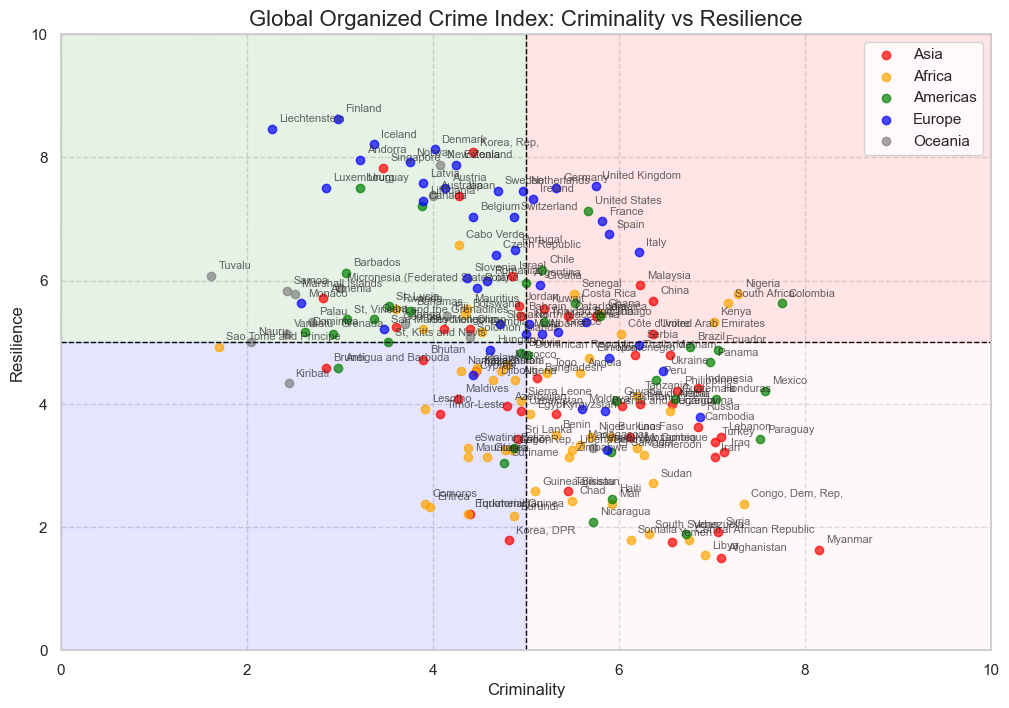

In [ ]:
def plot_global_oc_index(file_path=os.path.join(data_dir, 'global_oc_index.xlsx')):
    """
    Create a scatter plot of Criminality vs Resilience from the Global Organized Crime Index dataset.
    
    Parameters:
    file_path (str): Path to the Excel file containing the dataset
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name='2023_dataset')
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Color the quadrants
    plt.axvline(x=5, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=5, color='black', linestyle='--', linewidth=1)
    
    # Fill quadrants with semi-transparent colors
    plt.fill_between([0, 5], 5, 10, color='green', alpha=0.1)  # Top-left quadrant
    plt.fill_between([5, 10], 5, 10, color='red', alpha=0.1)  # Top-right quadrant
    plt.fill_between([0, 5], 0, 5, color='blue', alpha=0.1)   # Bottom-left quadrant
    plt.fill_between([5, 10], 0, 5, color='pink', alpha=0.1)  # Bottom-right quadrant
    
    # Color mapping for continents
    continent_colors = {
        'Africa': 'orange',
        'Americas': 'green',
        'Asia': 'red', 
        'Europe': 'blue',
        'Oceania': 'gray'
    }
    
    # Create scatter plot
    for continent in df['Continent'].unique():
        subset = df[df['Continent'] == continent]
        plt.scatter(subset['Criminality avg,'], subset['Resilience avg,'], 
                    c=continent_colors[continent], 
                    label=continent, 
                    alpha=0.7)
    
    # Add country labels
    for _, row in df.iterrows():
        plt.annotate(row['Country'], 
                     (row['Criminality avg,'], row['Resilience avg,']),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=8,
                     alpha=0.7)
    
    # Customize the plot
    plt.title('Global Organized Crime Index: Criminality vs Resilience', fontsize=16)
    plt.xlabel('Criminality', fontsize=12)
    plt.ylabel('Resilience', fontsize=12)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    return plt.gcf()

if __name__ == '__main__':
    fig = plot_global_oc_index()
    plt.show()

# Figure 8 - Projected WB Population
XX.

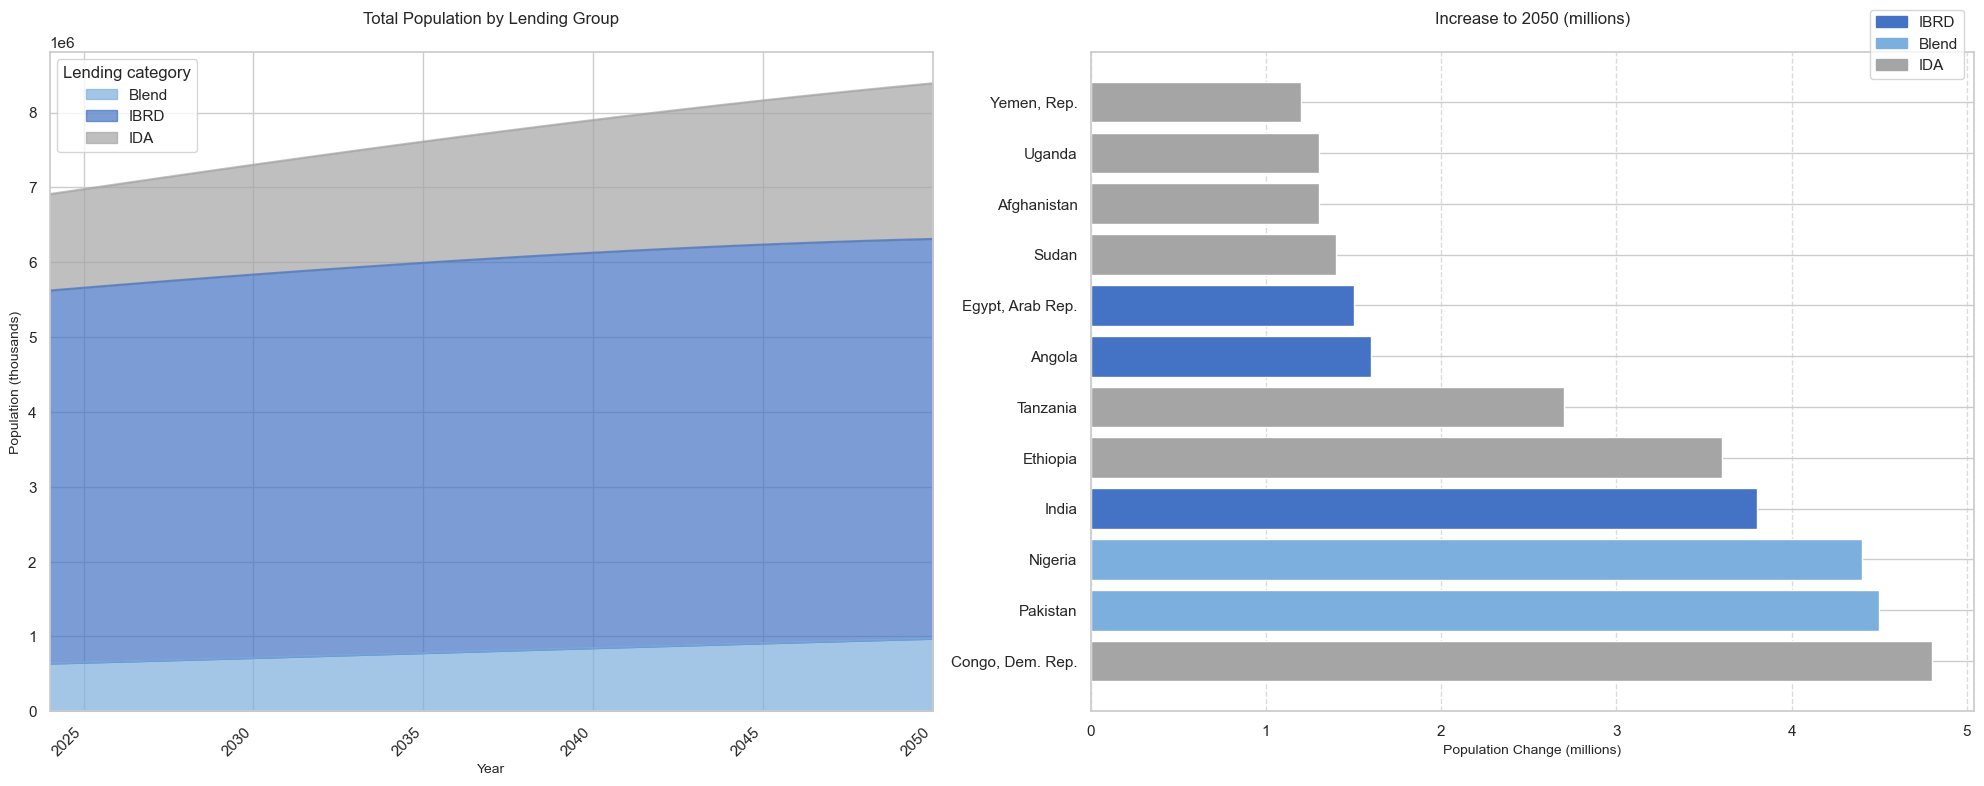

In [14]:
def analyze_population_data(data_dir):
    """
    Analyze population data showing total population trends and absolute change in millions
    """
    # Construct file path
    file_path = os.path.join(data_dir, 'un_pop_data.xlsx')
    lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')
    
    # Read the data
    df = pd.read_excel(file_path, sheet_name='Medium variant')
    lending_df = pd.read_excel(lend_group_path)
    
    # Drop rows with empty ISO3 code
    df = df.dropna(subset=['ISO3 Alpha-code'])
    
    # Ensure numeric conversion
    df['Population Change (thousands)'] = pd.to_numeric(df['Population Change (thousands)'], errors='coerce')
    df['Total Population, as of 1 January (thousands)'] = pd.to_numeric(
        df['Total Population, as of 1 January (thousands)'], 
        errors='coerce'
    )
    
    # Merge with lending group data
    df = df.merge(lending_df[['Code', 'Lending category', 'Economy']], 
                  left_on='ISO3 Alpha-code', 
                  right_on='Code', 
                  how='left')
    
    # Convert population change to millions and round to 1 decimal
    df['Population Change (millions)'] = (df['Population Change (thousands)'] / 1000).round(1)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Color mapping to match the visualization
    color_map = {
        'IBRD': '#4472C4',     # Royal blue
        'Blend': '#7CAFDD',    # Lighter blue
        'IDA': '#A5A5A5'       # Gray
    }
    
    # Left subplot: Stacked area chart by lending group
    lending_group_pop = df.pivot_table(
        index='Year',
        columns='Lending category',
        values='Total Population, as of 1 January (thousands)',
        aggfunc='sum'
    )
    
    # Filter data up to 2050
    lending_group_pop = lending_group_pop[lending_group_pop.index <= 2050]
    
    # Create stacked area plot
    lending_group_pop.plot(
        kind='area',
        stacked=True,
        ax=ax1,
        color=[color_map.get(cat, '#1F77B4') for cat in lending_group_pop.columns],
        alpha=0.7
    )
    
    # Set x-axis limits
    ax1.set_xlim(lending_group_pop.index.min(), 2050)
    
    ax1.set_title('Total Population by Lending Group', fontsize=12, pad=20)
    ax1.set_xlabel('Year', fontsize=10)
    ax1.set_ylabel('Population (thousands)', fontsize=10)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Right subplot: Horizontal bar chart of absolute changes in millions
    df_2050 = df[df['Year'] == 2050].copy()
    df_2050 = df_2050.dropna(subset=['Population Change (millions)', 'Economy', 'Lending category'])
    top_changes = df_2050.nlargest(12, 'Population Change (millions)').sort_values('Population Change (millions)')
    
    # Create horizontal bar chart
    bars = ax2.barh(
        range(len(top_changes)),
        top_changes['Population Change (millions)'],
        color=[color_map.get(cat, '#1F77B4') for cat in top_changes['Lending category']]
    )
    
    # Reverse the y-axis to show highest values at top
    ax2.invert_yaxis()
    
    # Customize bar chart
    ax2.set_title('Increase to 2050 (millions)', fontsize=12, pad=20)
    ax2.set_xlabel('Population Change (millions)', fontsize=10)
    ax2.set_yticks(range(len(top_changes)))
    ax2.set_yticklabels(top_changes['Economy'])
    
    # No value labels on bars
    
    # Add legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
    labels = list(color_map.keys())
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.99, 0.99))
    
    # Add gridlines to the bar chart
    ax2.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return df_2050.sort_values('Population Change (millions)', ascending=False)

# Main execution
if __name__ == "__main__":
    population_data = analyze_population_data(data_dir)

# Figure 9.1 - Development Indicators
XX.

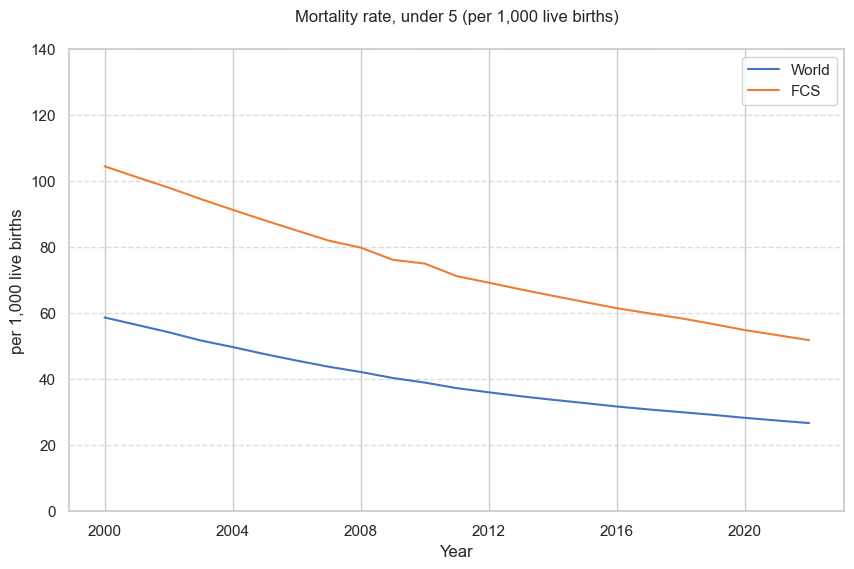

In [13]:
# FCS countries list
FCS_COUNTRIES = [
    'Afghanistan', 'Burkina Faso', 'Cameroon', 'Central African Republic', 
    'Congo, Dem. Rep.', 'Ethiopia', 'Haiti', 'Iraq', 'Lebanon', 'Mali', 
    'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Somalia', 'South Sudan',
    'Sudan', 'Syrian Arab Republic', 'Ukraine', 'West Bank and Gaza',
    'Yemen, Rep.', 'Burundi', 'Chad', 'Comoros', 'Congo, Rep.', 'Eritrea',
    'Guinea-Bissau', 'Kiribati', 'Kosovo', 'Libya', 'Marshall Islands',
    'Micronesia, Fed. Sts.', 'Papua New Guinea', 'São Tomé and Principe',
    'Solomon Islands', 'Timor-Leste', 'Tuvalu', 'Venezuela, RB', 'Zimbabwe'
]

def get_country_averages(wb_data, countries=None):
    """Helper function to calculate averages for a group of countries"""
    df = pd.DataFrame(wb_data)
    if countries:
        df = df[df['country'].isin(countries)]
    return df.groupby('date')['SH.DYN.MORT'].mean()

def plot_mortality_rate(wb_data):
    """
    Plot under-5 mortality rate
    Indicator: SH.DYN.MORT
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data for plotting
    df = pd.DataFrame(wb_data)
    
    # Calculate world average (using all countries)
    world_data = get_country_averages(wb_data)
    
    # Calculate FCS average
    fcs_data = get_country_averages(wb_data, FCS_COUNTRIES)
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('Mortality rate, under 5 (per 1,000 live births)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('per 1,000 live births')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    
    # Adjust y-axis range
    ax.set_ylim(0, 140)
    
    return fig


mortality_data = wb.get_indicator_data(indicator='SH.DYN.MORT', start_year=2000, end_year=2024)
fig = plot_mortality_rate(mortality_data)
plt.show()

# Figure 9.2 - Primary Completion Rate
XX.

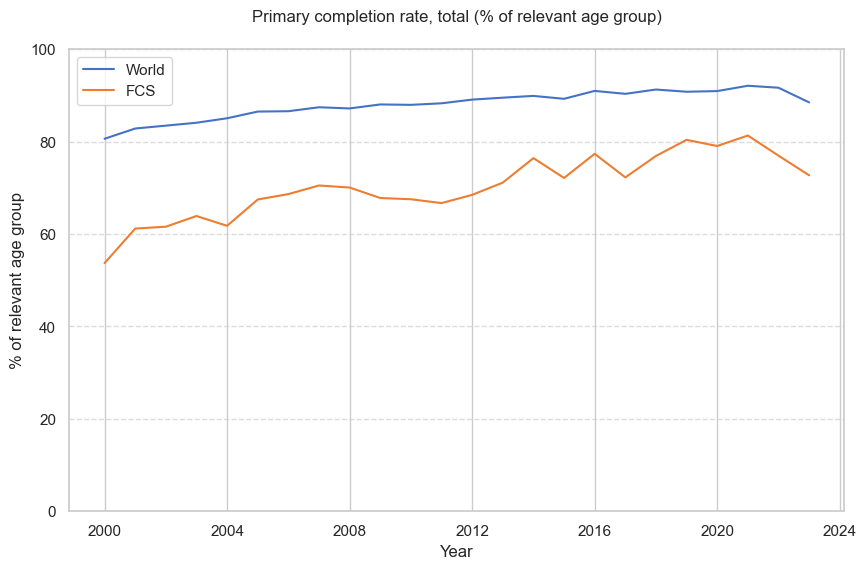

In [9]:
def plot_primary_completion(wb_data):
    """
    Plot primary completion rate
    Indicator: SE.PRM.CMPT.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SE.PRM.CMPT.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SE.PRM.CMPT.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('Primary completion rate, total (% of relevant age group)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of relevant age group')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
primary_data = wb.get_indicator_data(indicator='SE.PRM.CMPT.ZS', start_year=2000, end_year=2024)
fig = plot_primary_completion(primary_data)
plt.show()

# Figure 9.3 - Sanitation
XX.

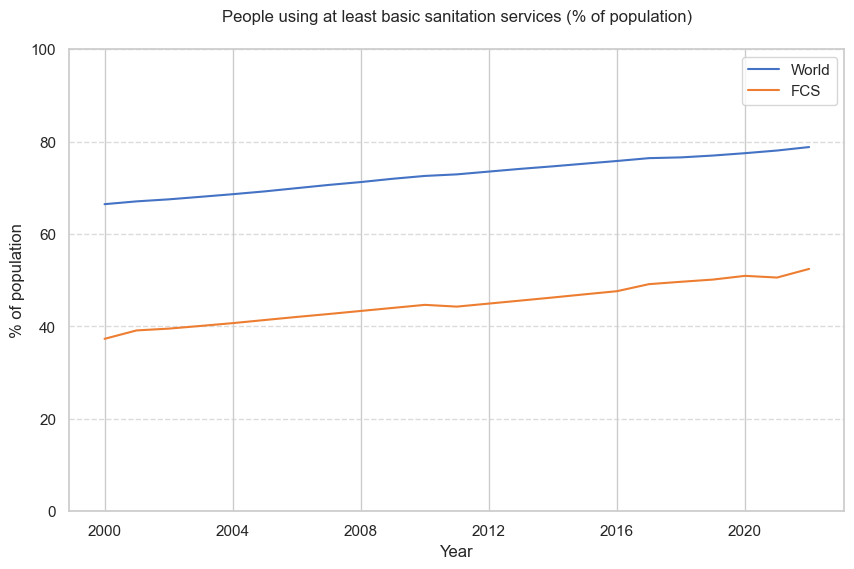

In [11]:
def plot_sanitation(wb_data):
    """
    Plot basic sanitation services
    Indicator: SH.STA.BASS.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SH.STA.BASS.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SH.STA.BASS.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('People using at least basic sanitation services (% of population)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of population')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
sanitation_data = wb.get_indicator_data(indicator='SH.STA.BASS.ZS', start_year=2000, end_year=2024)
fig = plot_sanitation(sanitation_data)
plt.show()

# Figure 9.4 - Basic Drink Water
XX. 

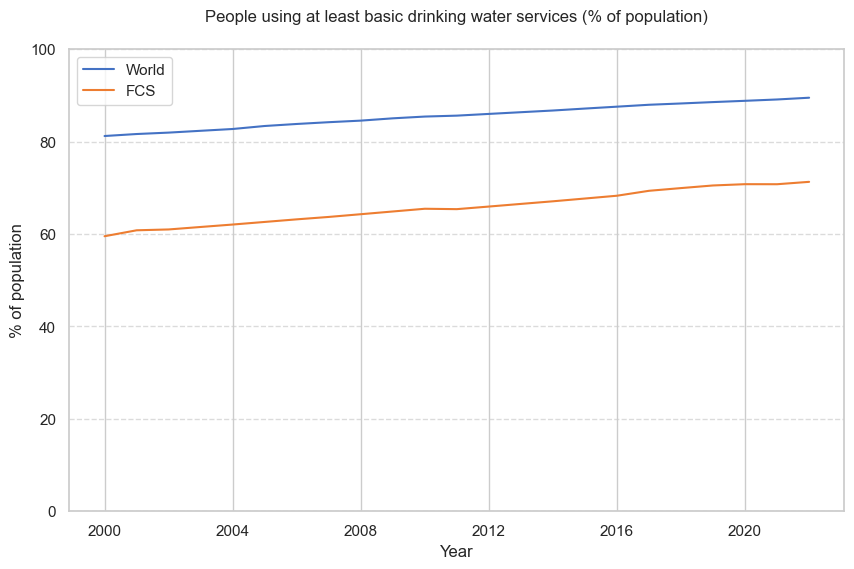

In [12]:
def plot_water_services(wb_data):
    """
    Plot basic drinking water services
    Indicator: SH.H2O.BASW.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SH.H2O.BASW.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SH.H2O.BASW.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('People using at least basic drinking water services (% of population)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of population')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
water_data = wb.get_indicator_data(indicator='SH.H2O.BASW.ZS', start_year=2000, end_year=2024)
fig = plot_water_services(water_data)
plt.show()

# Figure XX - Fragility Score Trends
Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics.

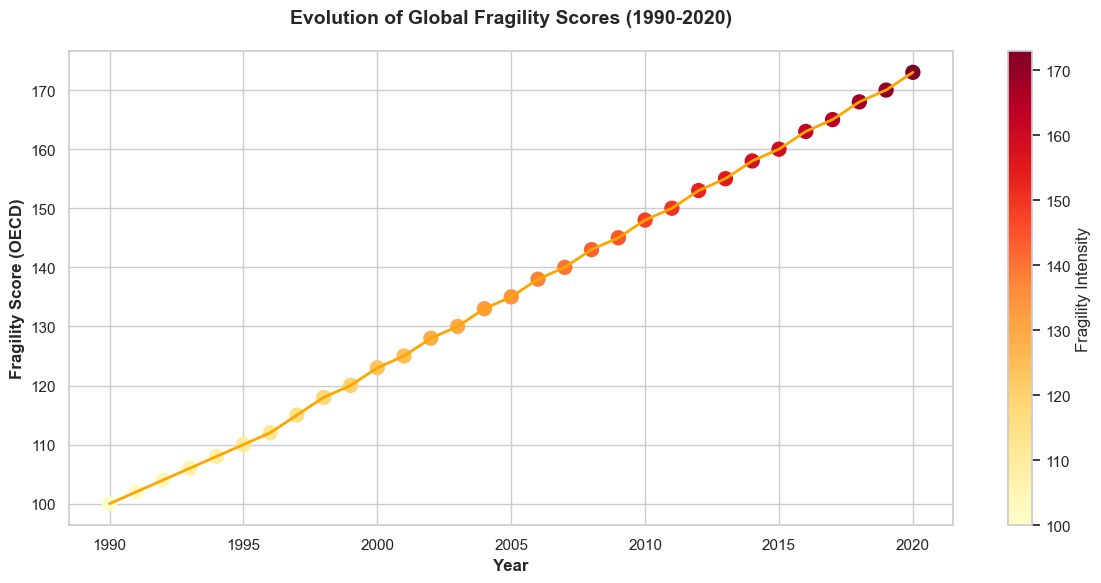

✓ Figure 5 generated successfully


In [7]:
# Create a scatter plot with connecting lines showing changes in fragility scores based on OECD metrics
def create_fragility_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    fragility = [100, 102, 104, 106, 108, 110, 112, 115, 118, 120, 
                123, 125, 128, 130, 133, 135, 138, 140, 143, 145, 
                148, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173]
    
    # Create scatter plot with gradient
    points = ax.scatter(years, fragility, c=fragility, 
                       cmap='YlOrRd', s=100)
    ax.plot(years, fragility, color='#FFA500', linewidth=2)
    
    # Add colorbar
    plt.colorbar(points, label='Fragility Intensity')
    
    # Customize appearance
    ax.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax.set_ylabel("Fragility Score (OECD)", fontsize=12, fontweight='bold')
    ax.set_title("Evolution of Global Fragility Scores (1990-2020)",
                fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Generate and display the plot
fig5 = create_fragility_plot()
plt.show()

print("✓ Figure 5 generated successfully")